In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

In [3]:
signal.firwin? # used to design a filter

In [4]:
signal.freqz? # used to analyzed a filter

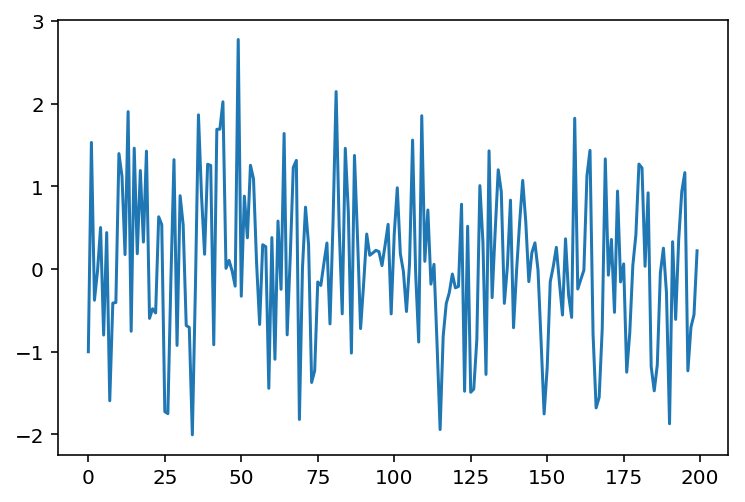

In [5]:
# let's create a random timeseries of gaussian random values
timeseries = np.random.randn(10000)
plt.plot(timeseries[:200])

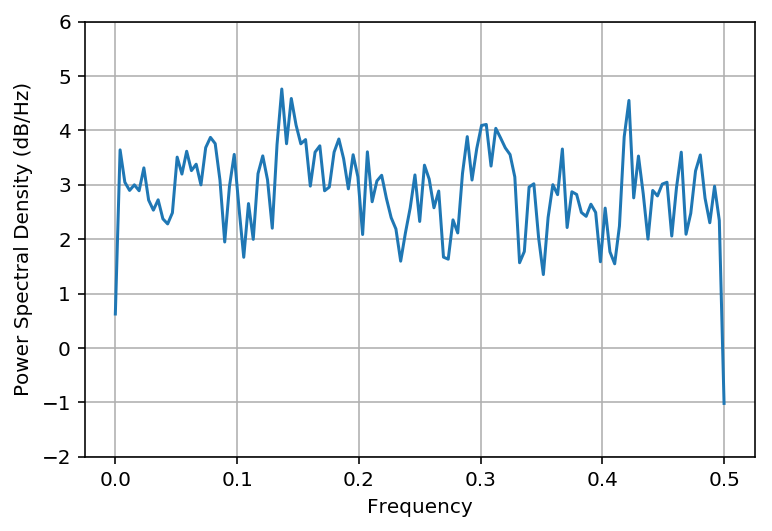

In [6]:
# let's look at the power spectrum of timeseries
plt.psd(timeseries, Fs=1.0);

In [31]:
# let's design a filter that cuts off frequencies above 0.3
numtaps = 101
lowpass_p3 = signal.firwin(numtaps, 0.3, fs=1.0)

In [32]:
lowpass_p3.shape

(101,)

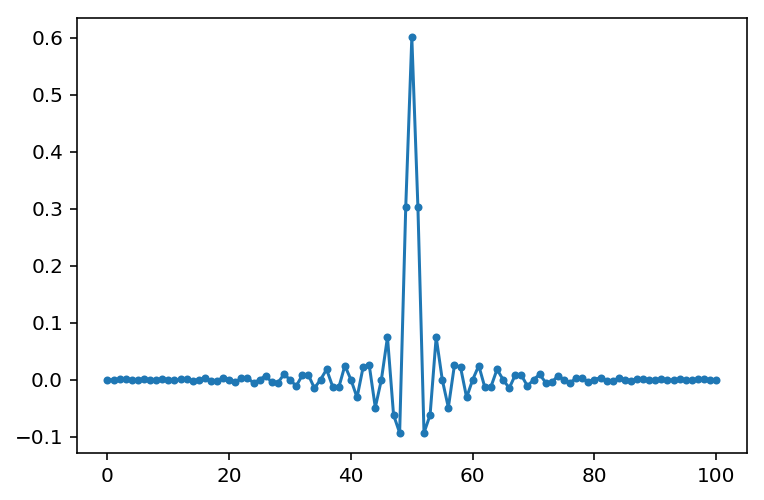

In [33]:
# let's look at the filter, by plotting it!
plt.plot(lowpass_p3, '.-');

In [11]:
# let's filter our timeseries with our new filter
lowpass_timeseries = np.convolve(timeseries, lowpass_p3, 'same')

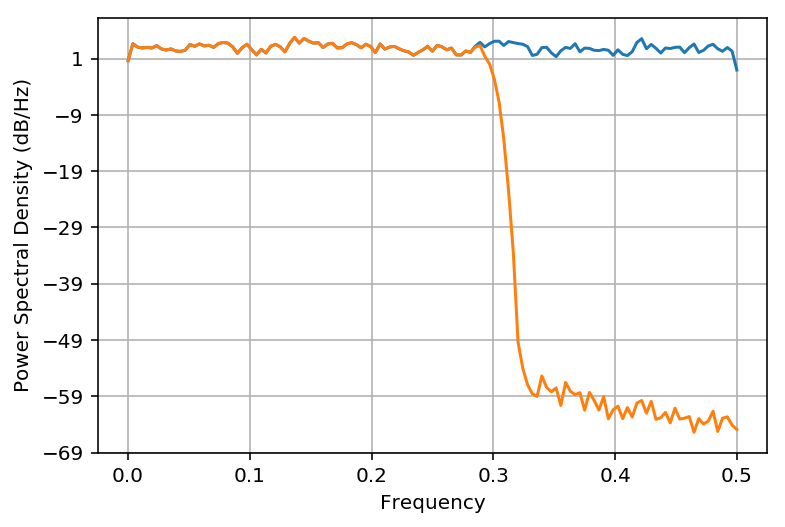

In [14]:
# let's look at the power spectrum of the result
plt.psd(timeseries, Fs=1.0);
plt.psd(lowpass_timeseries, Fs=1.0);

Text(0.5,0,'Time (samples)')

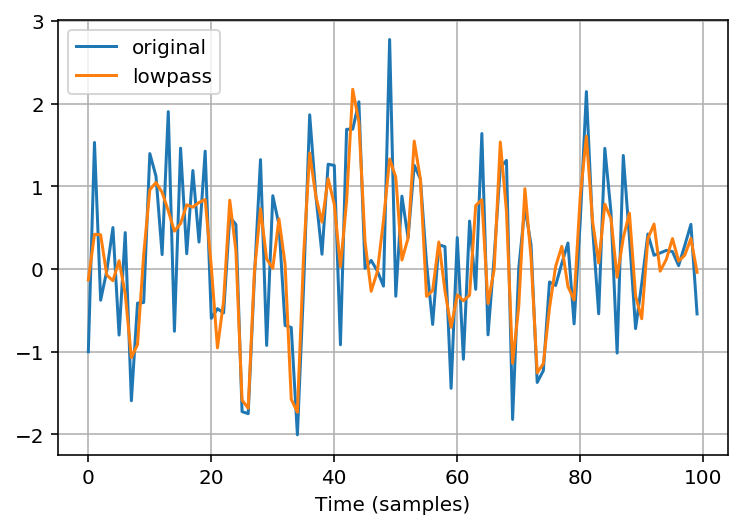

In [16]:
# plot a bit of each timeseries
plt.plot(timeseries[:100], label='original')
plt.plot(lowpass_timeseries[:100], label='lowpass')
plt.grid()
plt.legend()
plt.xlabel("Time (samples)")

In [19]:
# let's create a high-pass filtered version of our timeseries
highpass_timeseries = timeseries - lowpass_timeseries

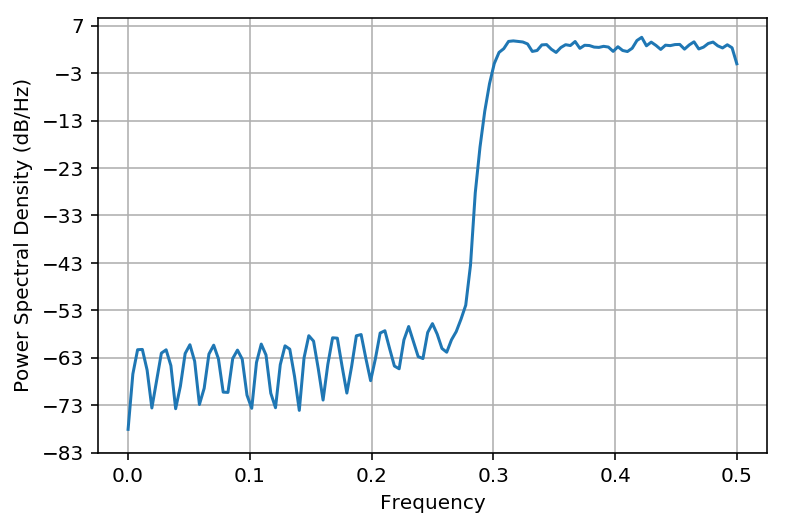

In [20]:
# let's look at the power spectrum of highpass_p3
plt.psd(highpass_timeseries, Fs=1.0);

Text(0.5,0,'Time (samples)')

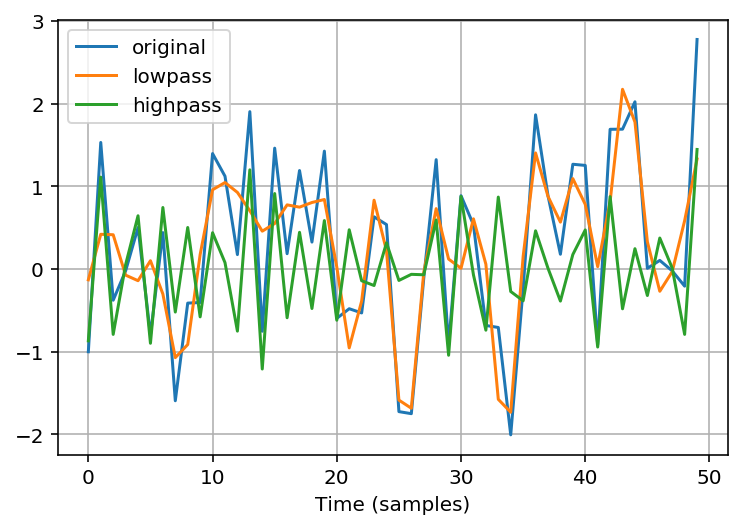

In [22]:
# plot a bit of each timeseries
plt.plot(timeseries[:50], label='original')
plt.plot(lowpass_timeseries[:50], label='lowpass')
plt.plot(highpass_timeseries[:50], label='highpass')
plt.grid()
plt.legend()
plt.xlabel("Time (samples)")

In [25]:
# to create a bandpass filter, let's first create another lowpass
# and then combine with our earlier filter to get a bandpass
lowpass_p1 = signal.firwin(numtaps, 0.1, fs=1.0)
lowpass_timeseries_p1 = np.convolve(timeseries, lowpass_p1, 'same')
bandpass_timeseries = lowpass_timeseries - np.convolve(timeseries, lowpass_p1, 'same')

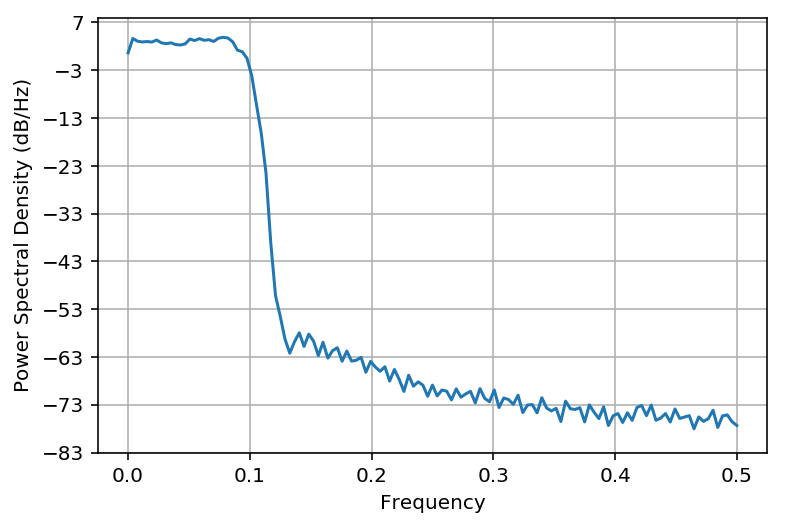

In [26]:
# power spectrum of the timeseries low-pass filtered at 0.1
plt.psd(lowpass_timeseries_p1, Fs=1.0);

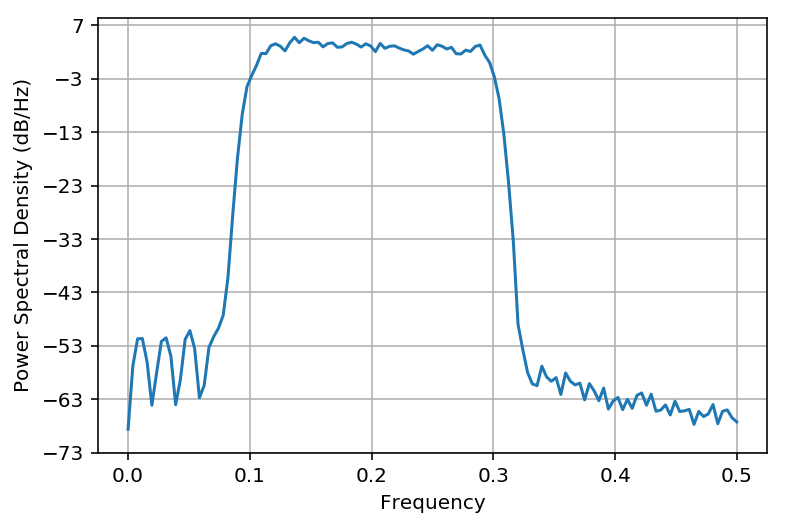

In [24]:
# power spectrum of the resulting band-pass filtered timeseries!
plt.psd(bandpass_timeseries, Fs=1.0);